In [1]:
import cellmap
import anndata
import scanpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [3]:
scanpy.pp.normalize_total(adata, target_sum=1e4)
scanpy.pp.log1p(adata)

In [4]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)

Normalized count data: spliced, unspliced.
computing neighbors


2023-04-13 14:32:36.385246: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-13 14:32:36.387178: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 14:32:36.424246: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 14:32:36.424908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 14:32:37.582834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:10) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:31) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


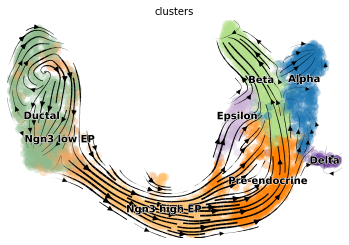

In [5]:
scv.pl.velocity_embedding_stream(adata)

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'log1p', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [7]:
%%time
import cellmap
cellmap.Hodge_decomposition(adata)

{'Contribution_ratio': {'Potential': '31.43%', 'Rotation': '68.57%'}}
CPU times: user 3min 6s, sys: 2min 31s, total: 5min 37s
Wall time: 1min 20s


In [10]:
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'potential', 'vorticity_umap', 'stream_line_umap', 'potential_vorticity_umap', 'potential_stream_line_umap', 'rotation_vorticity_umap', 'rotation_stream_line_umap', 'rotation'
    var: 'highly_variable_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'log1p', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'CellMap_log', 'CellMap_graph'
    obsm: 'X_pca', 'X_umap', 'velocity_umap', 'potential_velocity_umap', 'rotation_velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

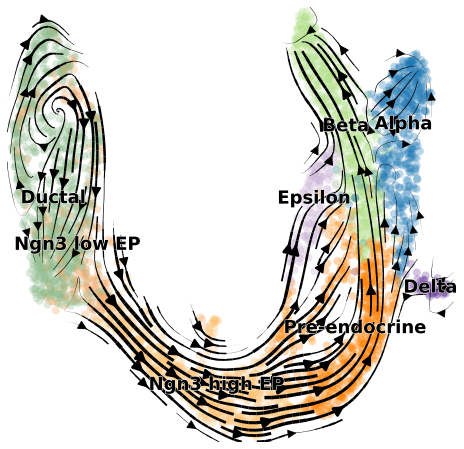

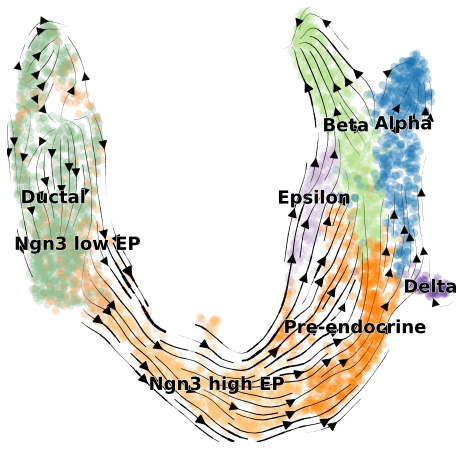

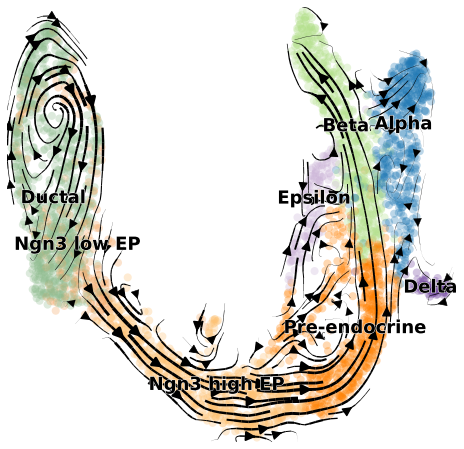

In [8]:
basis='umap'
vkey = 'velocity'
cluster_key = 'clusters'
density = 2
kwargs = {}
potential_vkey = 'potential_velocity'
rotation_vkey = 'rotation_velocity'
alpha = 0.3
legend_fontsize = 18

fig,ax = plt.subplots(1,1,figsize=(8,8))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=legend_fontsize, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
fig.savefig('materials/Overview_1_RNA_velocity.png', bbox_inches='tight')
fig,ax = plt.subplots(1,1,figsize=(8,8))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=potential_vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=legend_fontsize, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
fig.savefig('materials/Overview_2_Potential_flow.png', bbox_inches='tight')
fig,ax = plt.subplots(1,1,figsize=(8,8))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=rotation_vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=legend_fontsize, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
fig.savefig('materials/Overview_3_Rotational_flow.png', bbox_inches='tight')

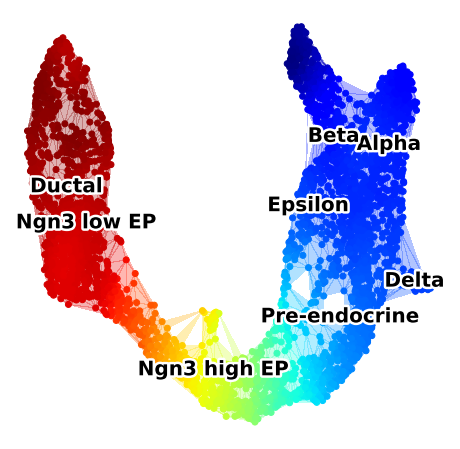

In [11]:
from matplotlib import patheffects as PathEffects
basis = 'umap'
potential_key = 'potential'
graph_key = 'CM_graph'
cluster_key = 'clusters'
show_graph = True
cutedge_vol  = None
cutedge_length = None
title = ''
save = False
filename = 'CellMap_view'
show_graph = True
alpha = 0.3
legend_fontsize = 18
kwargs = {'cmap':'jet'}

basis_key = 'X_%s' % basis
data_pos = adata.obsm[basis_key]
fig,ax = plt.subplots(figsize=(8,8))
sc = ax.scatter(data_pos[:,0],data_pos[:,1],c=adata.obs[potential_key],zorder=10,cmap='jet')
if show_graph:
    tri_ = cellmap.create_graph(data_pos[:,0],data_pos[:,1],cutedge_vol=cutedge_vol,cutedge_length=cutedge_length)
    ax.tripcolor(tri_,adata.obs[potential_key],lw=0.5,zorder=0,alpha=0.3,cmap='jet')
if cluster_key != None:
    if cluster_key in adata.obs.keys():
        cluster = adata.obs[cluster_key]
        for c in np.unique(cluster):
            txt = plt.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=20,ha='center', va='center',fontweight='bold',zorder=20)
            txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    else:
        print('There is no cluster key \"%s\" in adata.obs' % cluster_key)
ax.axis('off')
ax.set_title(title,fontsize=18)
# plt.colorbar(sc,aspect=20, pad=0.01, orientation='vertical')
fig.savefig('materials/Overview_4_Potential.png', bbox_inches='tight')

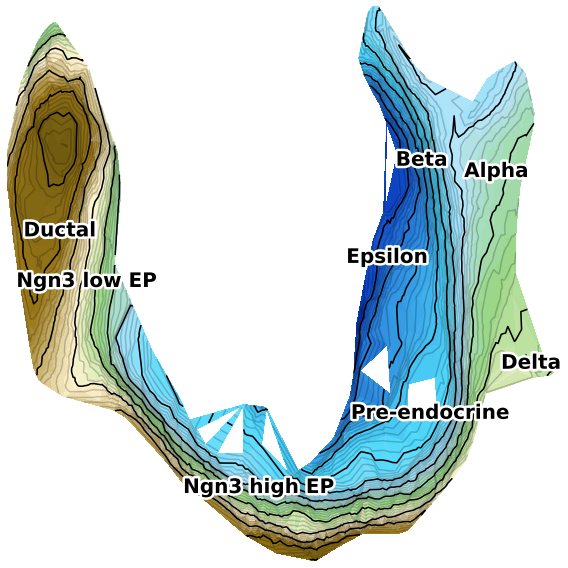

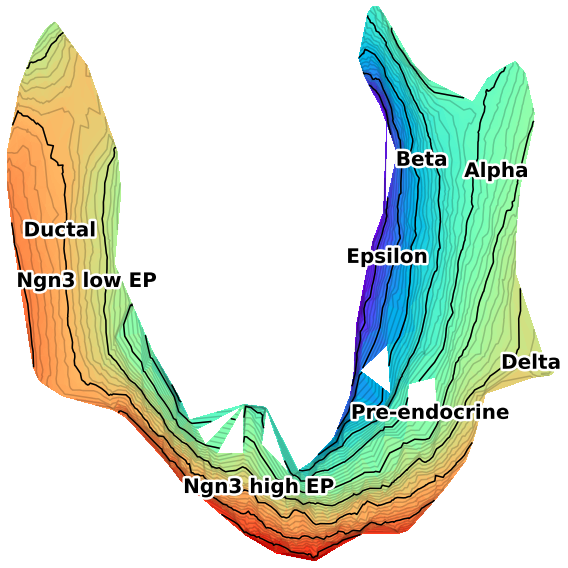

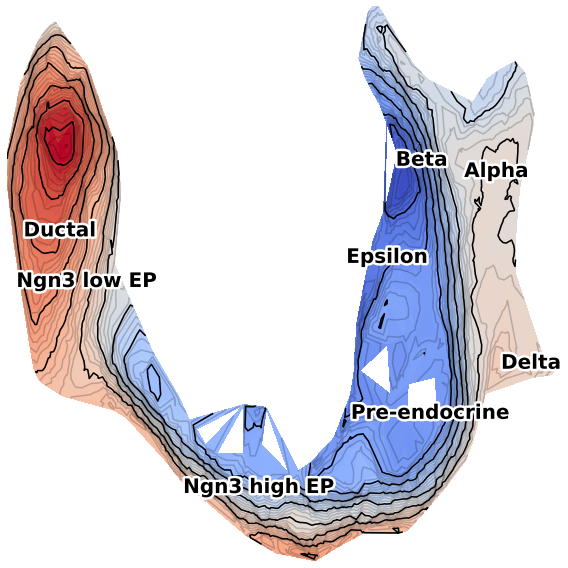

In [18]:
adata,
basis = 'umap'
contour_key = 'stream_line'
graph_key = 'CM_graph'
cluster_key = 'clusters'
potential_key = 'potential'
rotation_key = 'rotation'
cutedge_vol  = None
cutedge_length = None
title = ''
save = False
filename = 'CellMap_stream_line'
figsize = (8,8)
fontsize = 18
cbar = False

basis_key = 'X_%s' % basis

key_ = '%s_%s' % (contour_key,basis)
pot_key_ = '%s_%s_%s' % (potential_key,contour_key,basis)
rot_key_ = '%s_%s_%s' % (rotation_key,contour_key,basis)


data_pos = adata.obsm[basis_key]
tri_ = cellmap.create_graph(data_pos[:,0],data_pos[:,1],cutedge_vol=cutedge_vol,cutedge_length=cutedge_length)

contour_keys = [key_, pot_key_, rot_key_]
camps = [cellmap.cmap_earth(adata.obs[key_]),'rainbow','coolwarm']
titles = ['RNA velocity','Potential flow','Rotational flow']
filenames = ['Overview_5_RNA_velocity_SL','Overview_6_Potential_flow_SL','Overview_7_Rotational_flow_SL']

for i in range(3):
    fig,ax = plt.subplots(1,1,figsize=figsize,tight_layout=True)
    ax.axis('off')
    ax.set_title(title,fontsize=18)
    sc = ax.tripcolor(tri_,adata.obs[contour_keys[i]],cmap=camps[i])
    ax.tricontour(tri_,adata.obs[contour_keys[i]],lw=0.2,alpha=0.2,levels=75,zorder=3,colors='k',cmap=None,ls='-')
    ax.tricontour(tri_,adata.obs[contour_keys[i]],lw=1,alpha=1,levels=15,zorder=3,colors='k',cmap=None,ls='-')
    if cbar: plt.colorbar(sc,aspect=20, pad=0.01, orientation='vertical').set_label(contour_key,fontsize=20)
    # ax.set_title(titles[i],fontsize=fontsize)
    if cluster_key != None:
        if cluster_key in adata.obs.keys():
            cluster = adata.obs[cluster_key]
            for c in np.unique(cluster):
                txt = ax.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=20,ha='center', va='center',fontweight='bold',zorder=20)
                txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    else:
        print('There is no cluster key \"%s\" in adata.obs' % cluster_key)

    # if save: fig.savefig(filename+'.png', bbox_inches='tight')
    fig.savefig('materials/'+filenames[i]+'.png', bbox_inches='tight')